<center>

# Task-02

# Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.



### Dataset :- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


</center>

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Reading the data

In [12]:
raw_data = pd.read_csv("Data/Mall_Customers.csv")
raw_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Filtering

In [13]:
raw_data.drop(columns=["CustomerID"] , inplace=True)

In [14]:
le = LabelEncoder()
raw_data['Gender'] = le.fit_transform(raw_data['Gender'])
raw_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [17]:
raw_data.isnull().sum()
raw_data.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Finding approximated better values of K using Elbow Method

In [20]:
max_clusters = 30
kmeans = [KMeans(n_clusters=i, n_init=10) for i in range(1,max_clusters)]
wcss = [kmeans[i].fit(raw_data).inertia_ for i in range(len(kmeans))]

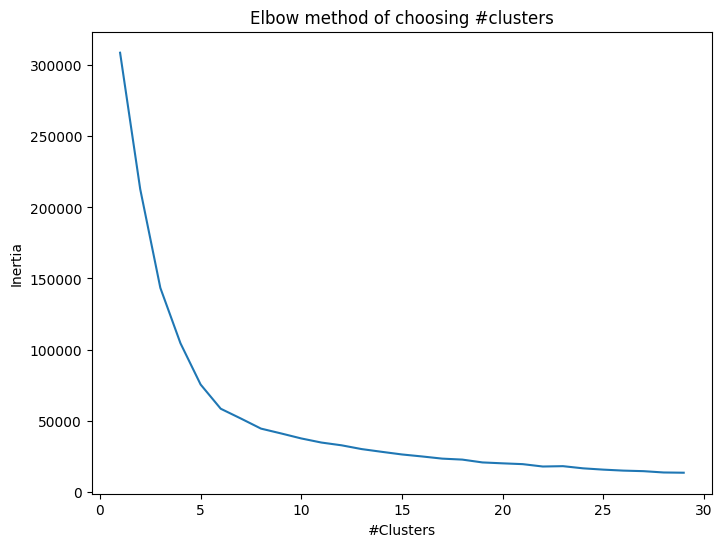

In [21]:
plt.figure(figsize=(8,6))
plt.plot(range(1,max_clusters), wcss)
plt.title('Elbow method of choosing #clusters')
plt.xlabel('#Clusters')
plt.ylabel('WCSS')
plt.show()

# Predicting cluster labels

In [23]:
model=KMeans(n_clusters=6)
y=model.fit_predict(raw_data)

In [24]:
y

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 1, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [26]:
plt.scatter(raw_data[y==0,1],raw_data[y==0,2],color='b')
plt.scatter(raw_data[y==1,1],raw_data[y==1,2],color='r')
plt.scatter(raw_data[y==2,1],raw_data[y==2,2],color='orange')
plt.scatter(raw_data[y==3,1],raw_data[y==3,2],color='g')
plt.scatter(raw_data[y==4,1],raw_data[y==4,2],color='pink')
plt.scatter(raw_data[y==5,1],raw_data[y==5,2],color='y')

InvalidIndexError: (array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True,  True,  True, False,  True,  True, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False,  True,  True, False, False,
       False, False, False,  True, False,  True,  True, False, False,
        True, False, False,  True, False, False,  True,  True, False,
       False,  True, False,  True,  True,  True, False,  True, False,
        True,  True, False, False,  True, False,  True, False, False,
       False, False, False,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]), 1)